# The Attention Mechanism
Copyright 2021-2023, Denis Rothman, MIT License. Denis Rothman rewrote the reference notebook entirely in basic Python with no frameworks. Three more steps were added, and a Hugging Face transformer example was added. The original images were taken out, redesigned by Denis Rothman for educational purposes, and inserted in the book descriptions of the multi-attention sub-layer.

The goal of this notebook is to obtain a mathematical view of the attention mechanism of transformer models. An industry 4.0 developer will become and AI expert with in-depth NLP knowledge.

[The Reference Colaboratory Notebook was written by Manuel Romero](https://colab.research.google.com/drive/1rPk3ohrmVclqhH7uQ7qys4oznDdAhpzF)

[A Medium article was written by Raimi Karim](https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a)

#Step 1: Represent the input

In [1]:
from IPython.display import Image     #This is used for rendering images in the notebook

In [2]:
import requests
from PIL import Image
from io import BytesIO

def get_image_from_github(image_name):
    # The base URL of the image files in the GitHub repository
    base_url = 'https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/main/Notebook%20images/02/'

    # Make the request
    response = requests.get(base_url + image_name)

    # Check if the request was successful
    if response.status_code == 200:
        # Read the image
        image = Image.open(BytesIO(response.content))

        # Return the image
        return image
    else:
        print(f'Error {response.status_code}: Could not access the image file.')
        return None

Mounted at /content/drive


In [3]:
import numpy as np
from scipy.special import softmax

In [4]:
print("Step 1: Input : 3 inputs, d_model=4")
x =np.array([[1.0, 0.0, 1.0, 0.0],   # Input 1
             [0.0, 2.0, 0.0, 2.0],   # Input 2
             [1.0, 1.0, 1.0, 1.0]])  # Input 3
print(x)

Step 1: Input : 3 inputs, d_model=4
[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


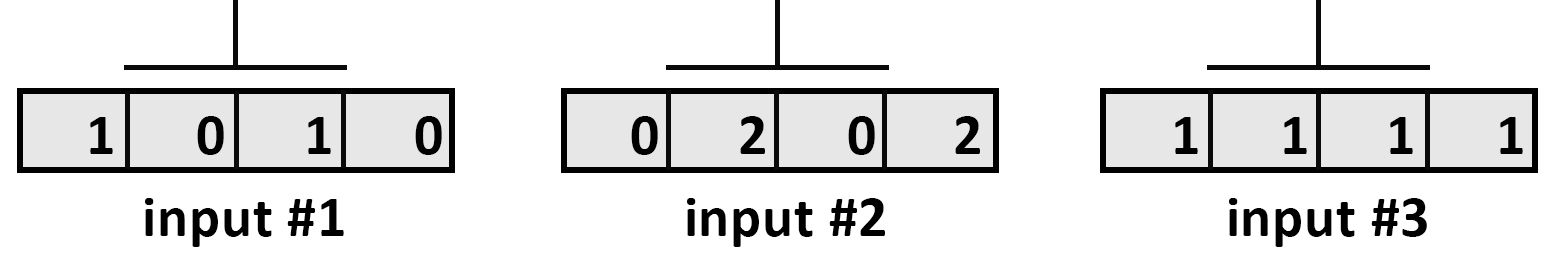

In [5]:
display(get_image_from_github('B19899_02_11.png') or print('Image not found'))

#Step 2: Initializing the weight matrices

In [6]:
print("Step 2: weights 3 dimensions x d_model=4")
print("w_query")
w_query =np.array([[1, 0, 1],
                   [1, 0, 0],
                   [0, 0, 1],
                   [0, 1, 1]])
print(w_query)

Step 2: weights 3 dimensions x d_model=4
w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]


In [7]:
print("w_key")
w_key =np.array([[0, 0, 1],
                 [1, 1, 0],
                 [0, 1, 0],
                 [1, 1, 0]])
print(w_key)

w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]


In [8]:
print("w_value")
w_value = np.array([[0, 2, 0],
                    [0, 3, 0],
                    [1, 0, 3],
                    [1, 1, 0]])
print(w_value)

w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


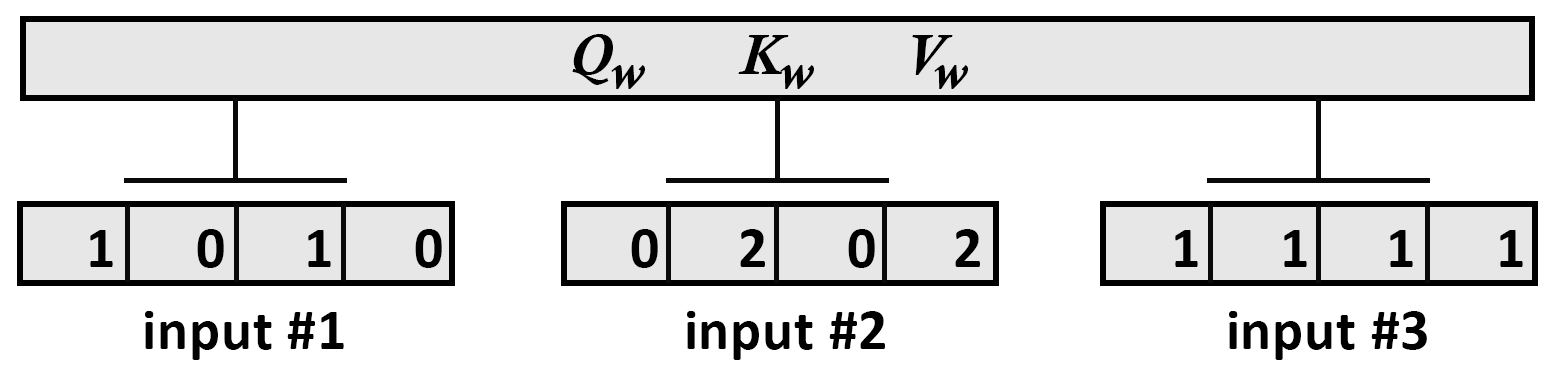

In [9]:
display(get_image_from_github('B19899_02_12.png') or print('Image not found'))

#Step 3: Matrix multiplication to obtain Q, K, and V

In [10]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Queries: x * w_query")
Q=np.matmul(x,w_query)
print(Q)

Step 3: Matrix multiplication to obtain Q,K,V
Queries: x * w_query
[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]


In [11]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Keys: x * w_key")
K=np.matmul(x,w_key)
print(K)

Step 3: Matrix multiplication to obtain Q,K,V
Keys: x * w_key
[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]


In [12]:
print("Values: x * w_value")
V=np.matmul(x,w_value)
print(V)

Values: x * w_value
[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


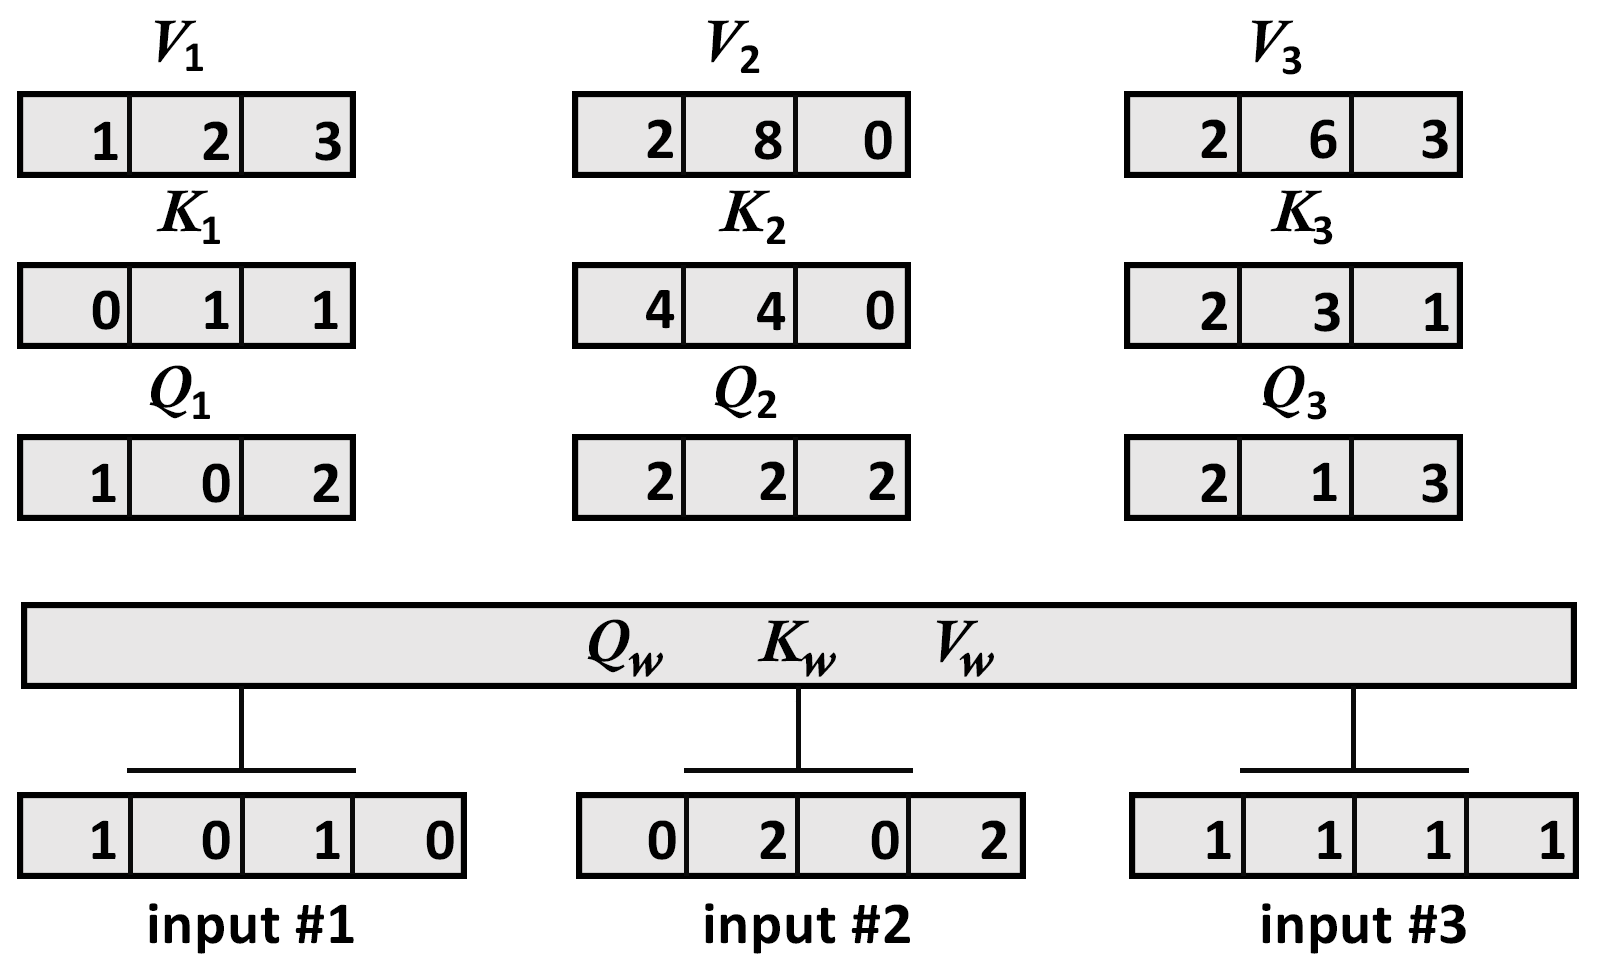

In [13]:
display(get_image_from_github('B19899_02_13.png') or print('Image not found'))

#Step 4: Scaled attention scores

In [14]:
print("Step 4: Scaled Attention Scores")
k_d=1   #square root of k_d simplified to 1 for this example
attention_scores = (Q @ K.transpose())/k_d
print(attention_scores)

Step 4: Scaled Attention Scores
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


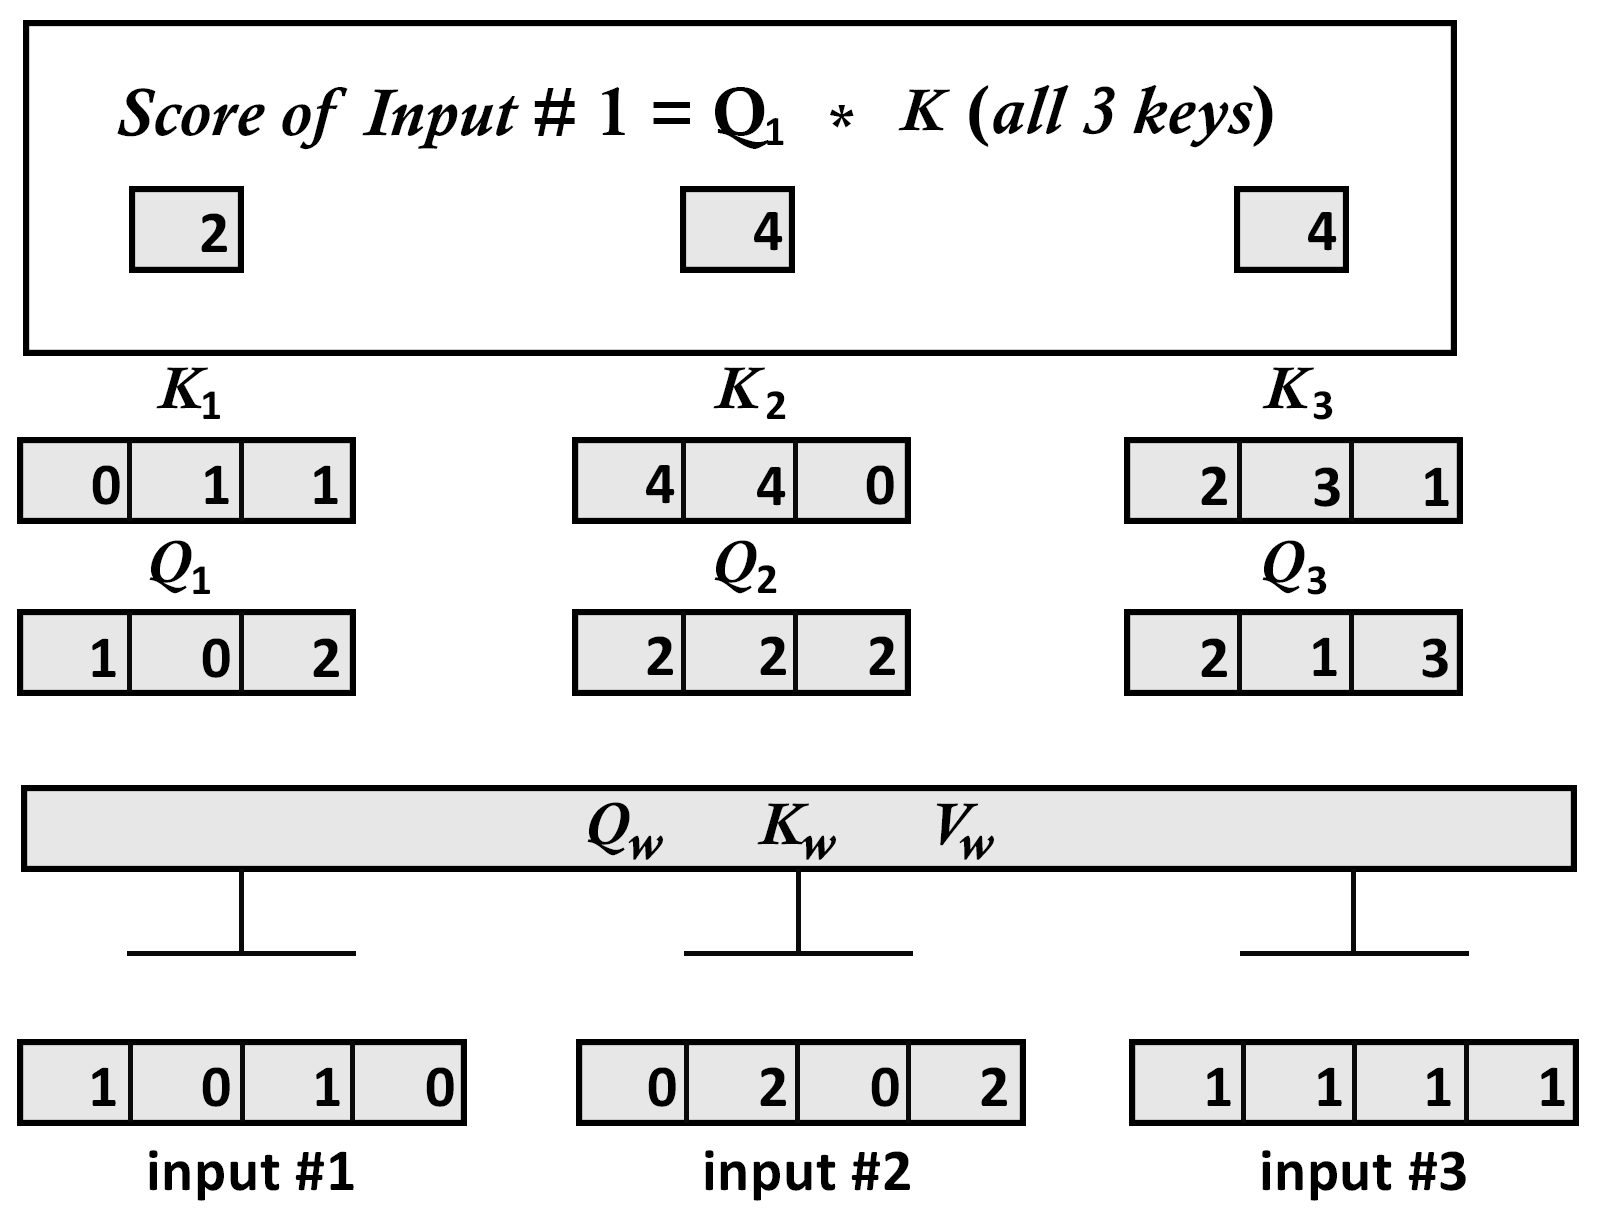

In [15]:
display(get_image_from_github('B19899_02_14.png') or print('Image not found'))

#Step 5: Scaled softmax attention scores for each vector

In [16]:
print("Step 5: Scaled softmax attention_scores for each vector")
attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])
print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])

Step 5: Scaled softmax attention_scores for each vector
[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


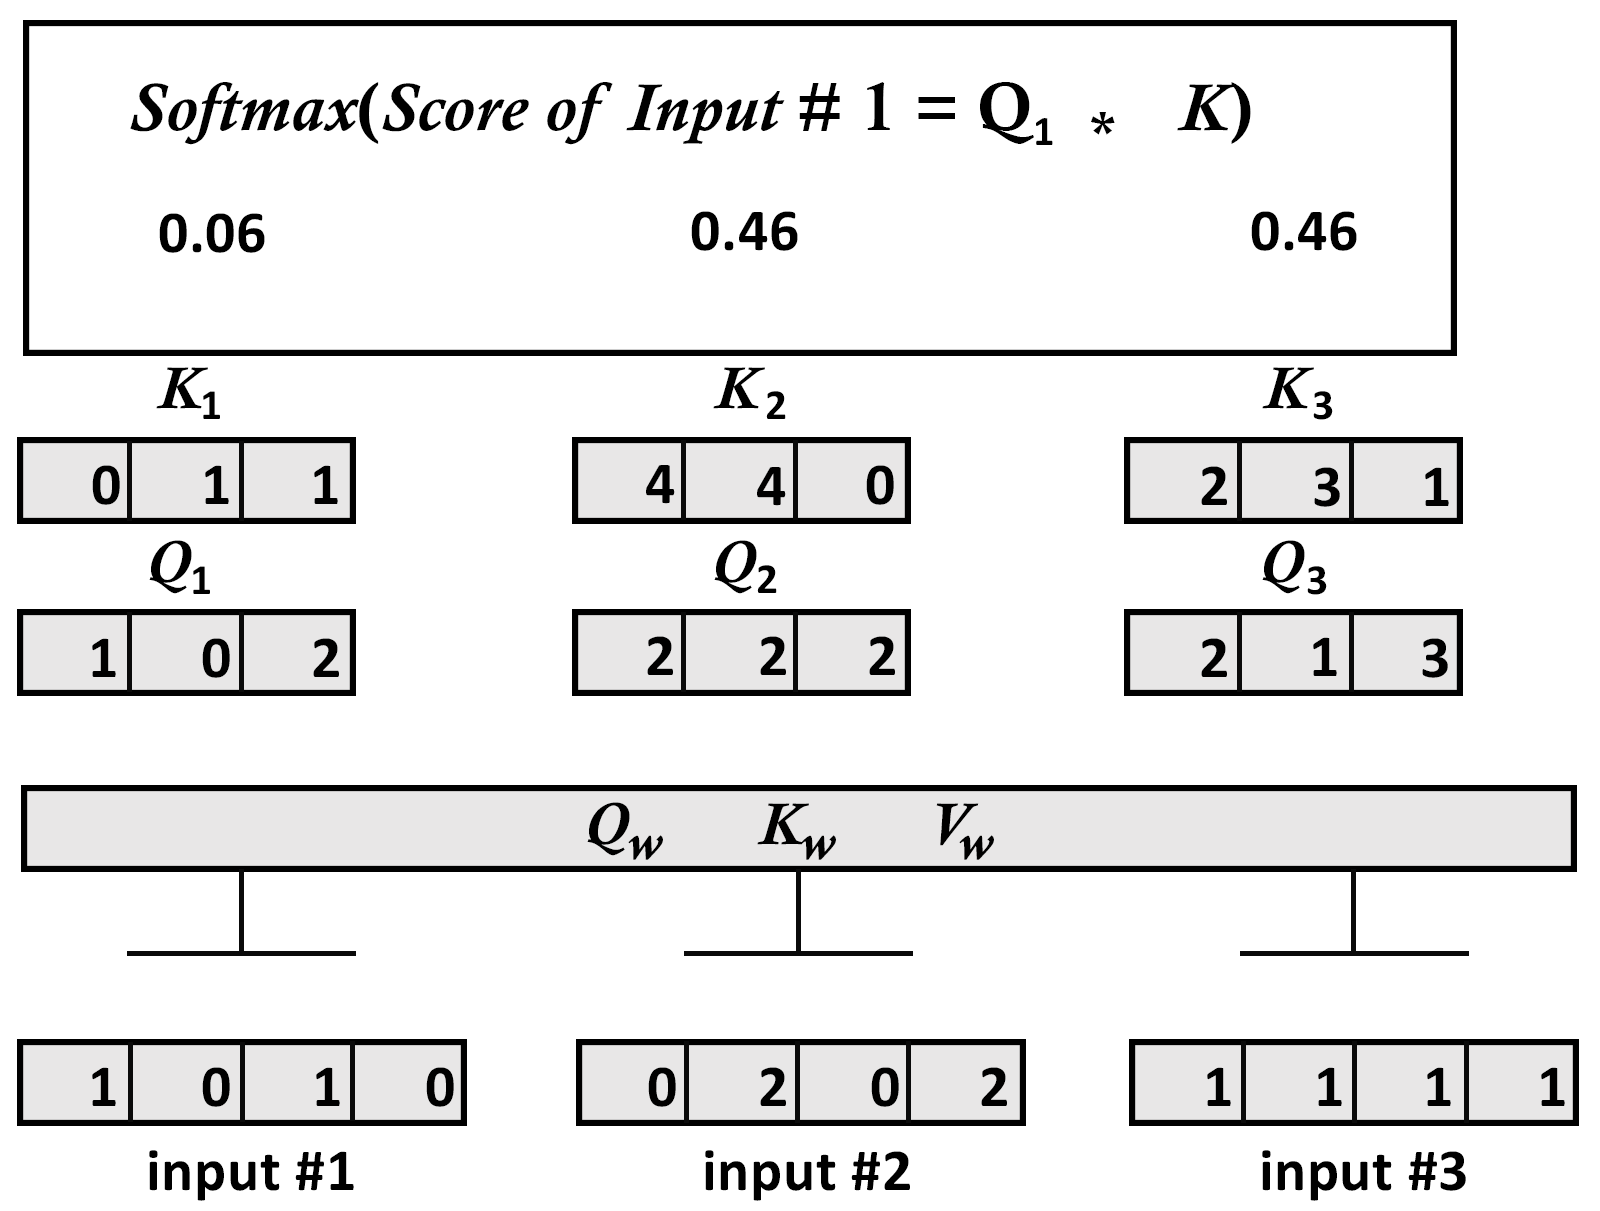

In [17]:
display(get_image_from_github('B19899_02_15.png') or print('Image not found'))

#Step 6: The final attention representations

In [18]:
print("Step 6: attention value obtained by score1/k_d * V")
print(V[0])
print(V[1])
print(V[2])
print("Attention 1")
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)

print("Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)

print("Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)

Step 6: attention value obtained by score1/k_d * V
[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]
Attention 1
[0.06337894 0.12675788 0.19013681]
Attention 2
[0.93662106 3.74648425 0.        ]
Attention 3
[0.93662106 2.80986319 1.40493159]


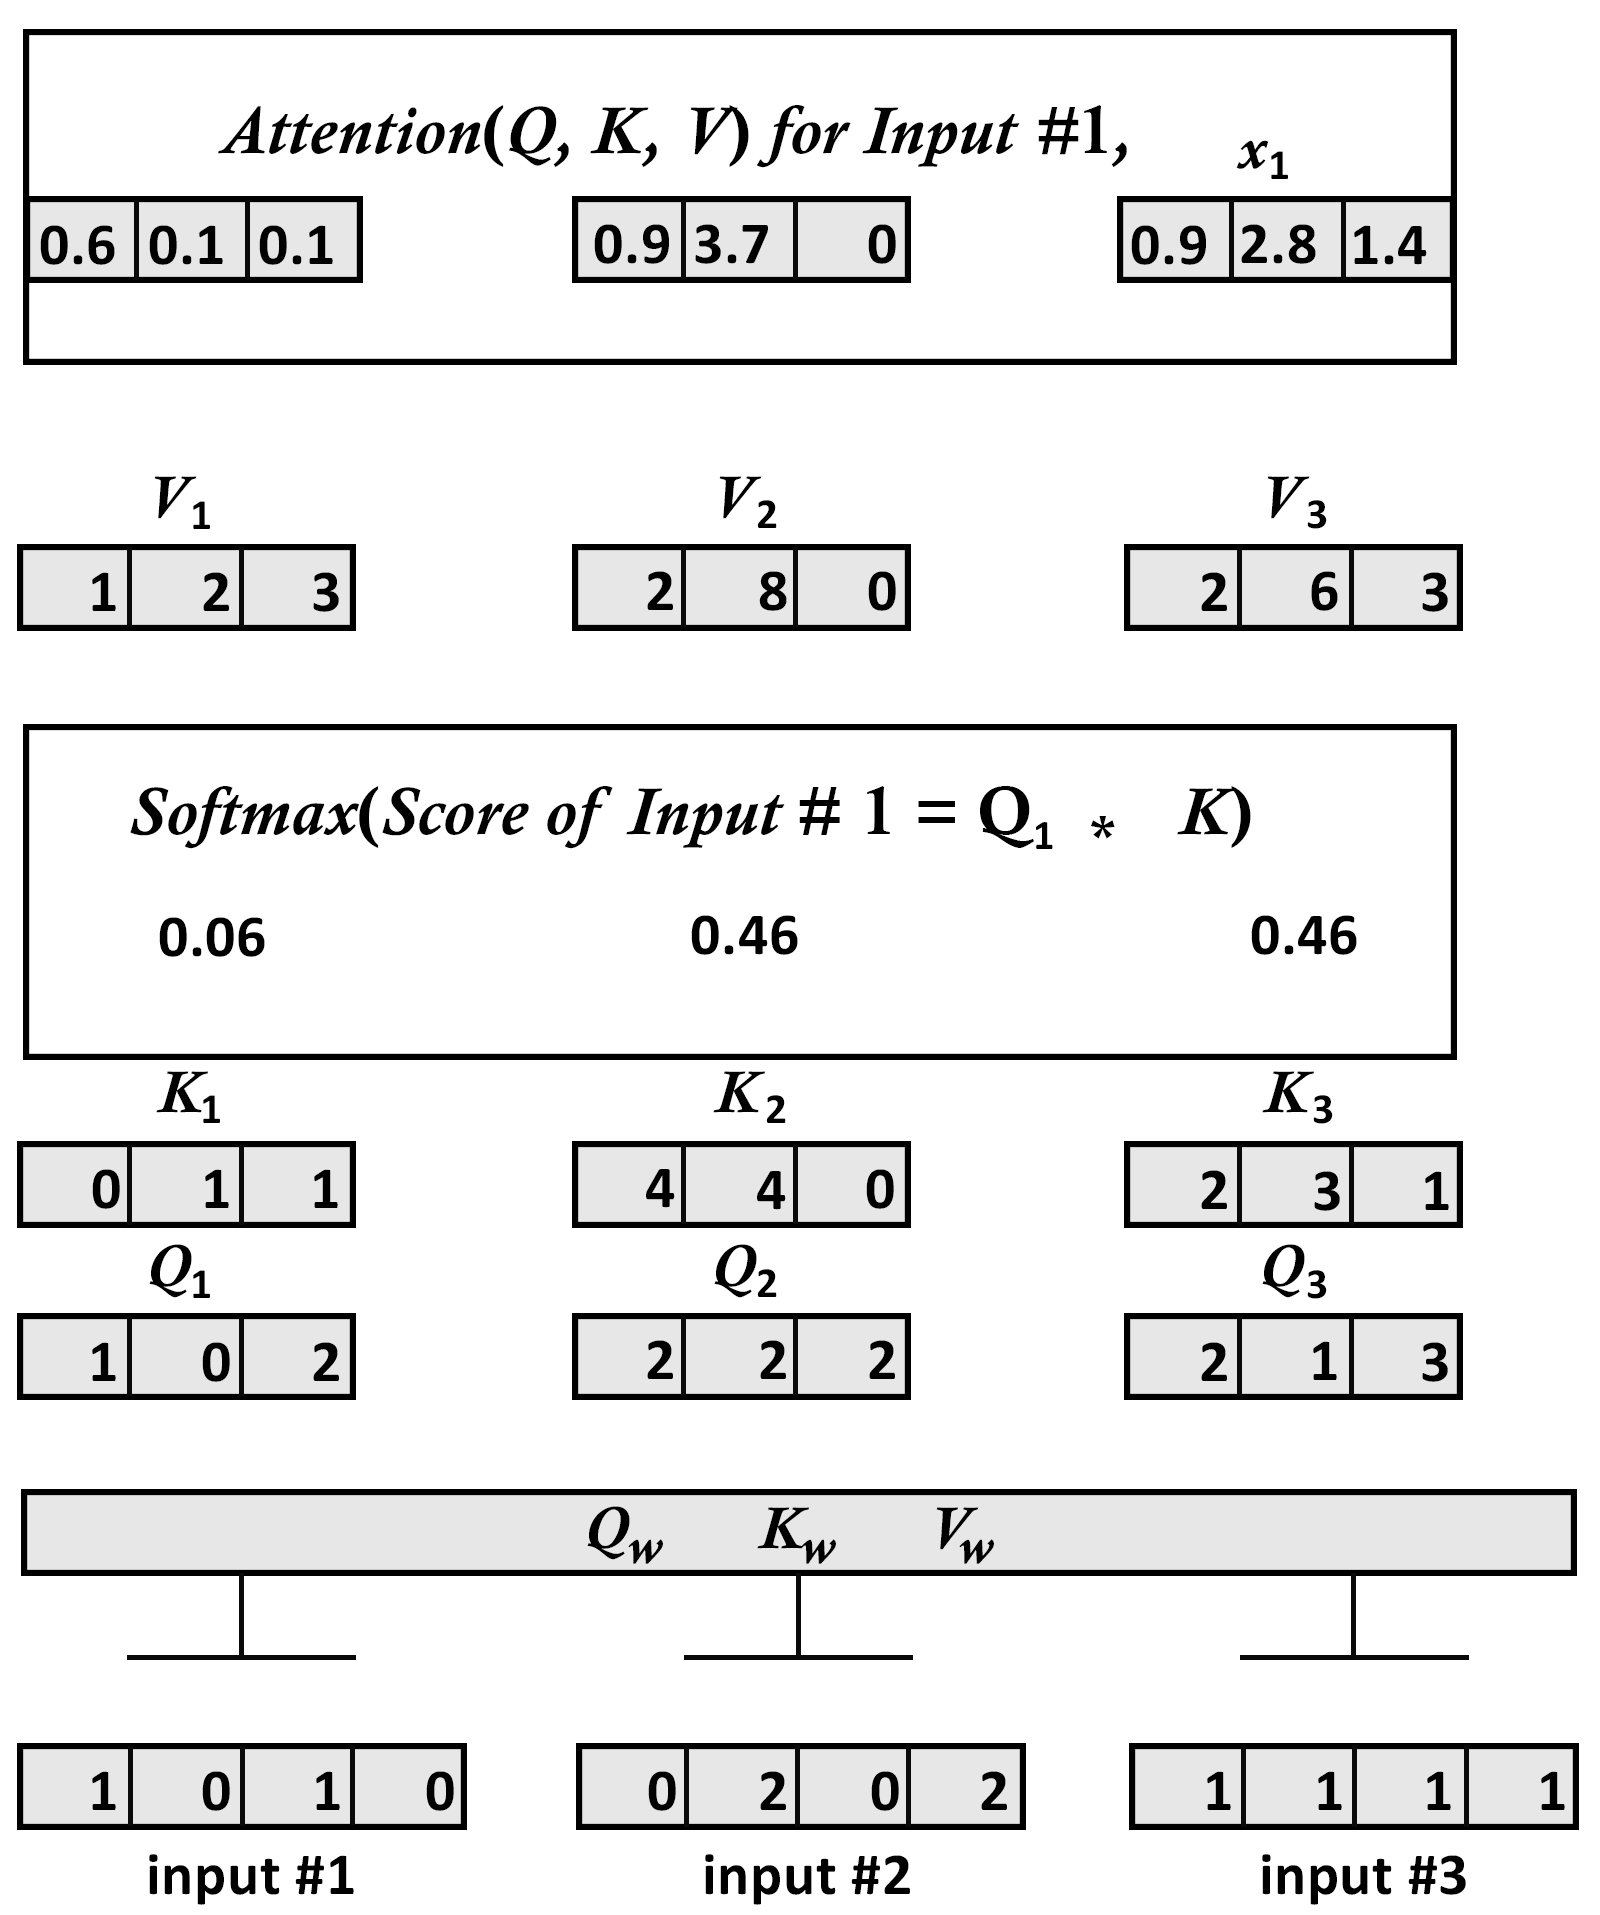

In [19]:
display(get_image_from_github('B19899_02_16.png') or print('Image not found'))

#Step 7: Summing up the results

In [20]:
print("Step 7: summed the results to create the first line of the output matrix")
attention_input1=attention1+attention2+attention3
print(attention_input1)

Step 7: summed the results to create the first line of the output matrix
[1.93662106 6.68310531 1.59506841]


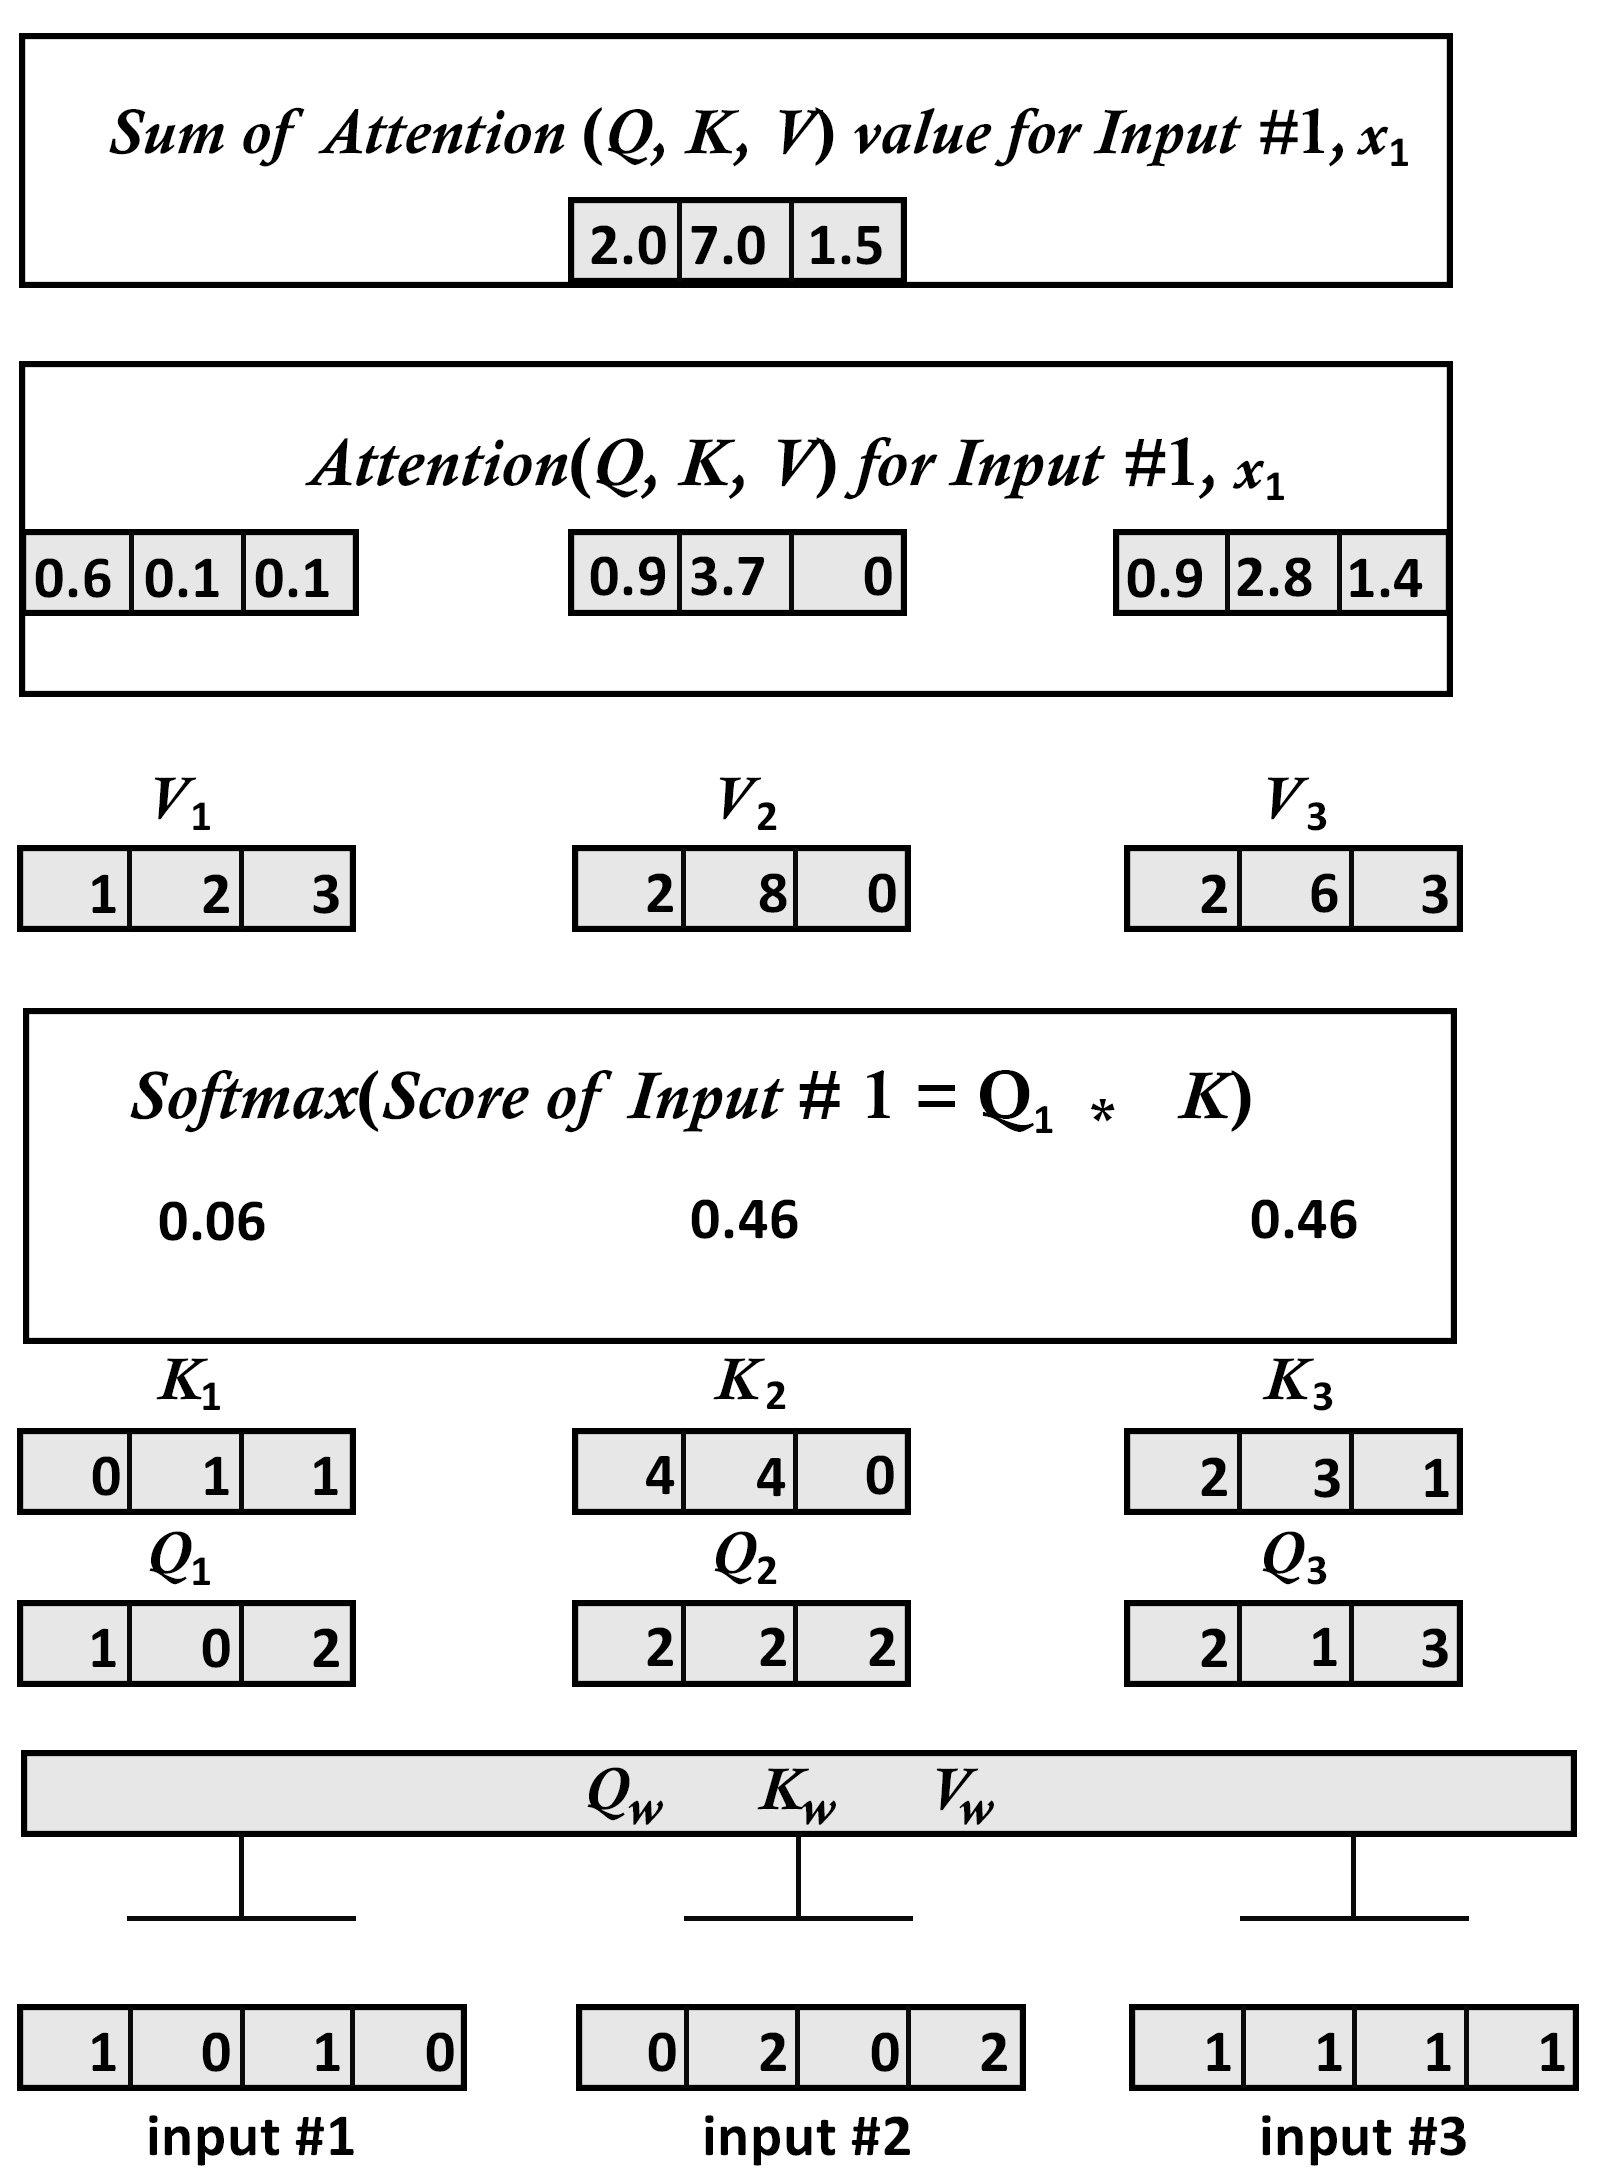

In [21]:
display(get_image_from_github('B19899_02_17.png') or print('Image not found'))

#Step 8: Steps 1 to 7 for all the inputs

In [22]:
print("Step 8: Step 1 to 7 for inputs 1 to 3")
#We assume we have 3 results with learned weights (they were not trained in this example)
#We assume we are implementing the original Transformer paper. We will have 3 results of 64 dimensions each
attention_head1=np.random.random((3, 64))
print(attention_head1)

Step 8: Step 1 to 7 for inputs 1 to 3
[[7.77172243e-01 6.42604240e-01 9.04252683e-01 1.78459192e-01
  3.51097824e-01 1.40082868e-01 1.84200339e-01 7.97107422e-01
  3.94136470e-01 3.54674884e-01 6.43504903e-04 4.25425852e-01
  3.25263651e-01 8.38371337e-01 5.11696994e-01 9.16911459e-01
  1.35659370e-01 2.76482797e-01 8.77964155e-01 8.08573052e-01
  1.21201997e-01 8.36394841e-01 4.33890441e-01 5.31559199e-01
  3.58636762e-01 6.07019516e-01 2.88321683e-01 7.07034735e-01
  8.06699335e-01 9.37488669e-01 3.21720452e-02 1.00060723e-01
  3.98633471e-01 8.32131477e-01 7.29404106e-01 6.32422201e-01
  1.81834047e-01 5.68704038e-01 2.29900994e-01 4.90716213e-01
  2.29401921e-01 6.11376407e-01 6.34059997e-01 7.07149049e-01
  7.20465721e-01 2.16569800e-02 8.15125333e-01 5.62468389e-01
  2.97118079e-01 9.14813475e-01 3.58953502e-01 4.18280056e-01
  2.87478325e-01 6.03291955e-01 6.49858454e-01 2.44934141e-01
  7.18995370e-01 9.28400699e-01 4.70897090e-01 6.84751613e-01
  4.03159217e-03 3.73931633e-01 

#Step 9: The output of the heads of the attention sublayer

In [23]:
print("Step 9: We assume we have trained the 8 heads of the attention sub-layer")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("shape of one head",z0h1.shape,"dimension of 8 heads",64*8)

Step 9: We assume we have trained the 8 heads of the attention sub-layer
shape of one head (3, 64) dimension of 8 heads 512


#Step 10: Concatenation of the output of the heads

In [24]:
print("Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model")
output_attention=np.hstack((z0h1,z1h2,z2h3,z3h4,z4h5,z5h6,z6h7,z7h8))
print(output_attention)

Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model
[[0.44353995 0.39529156 0.92383317 ... 0.32511208 0.83644302 0.22103558]
 [0.9530263  0.5833982  0.93386149 ... 0.47760363 0.68139488 0.50569421]
 [0.45493872 0.83572554 0.54525656 ... 0.64079709 0.99134897 0.19498025]]


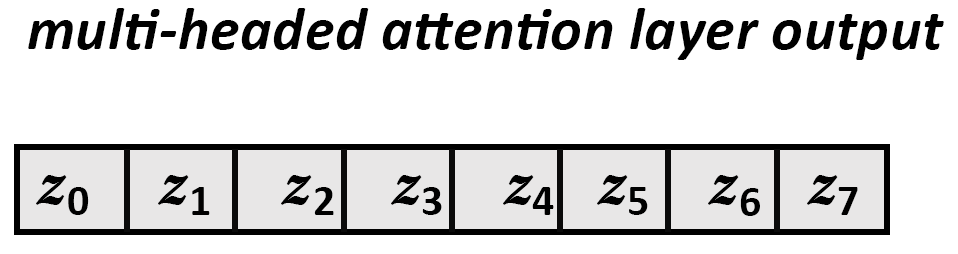

In [25]:
display(get_image_from_github('B19899_02_18.png') or print('Image not found'))

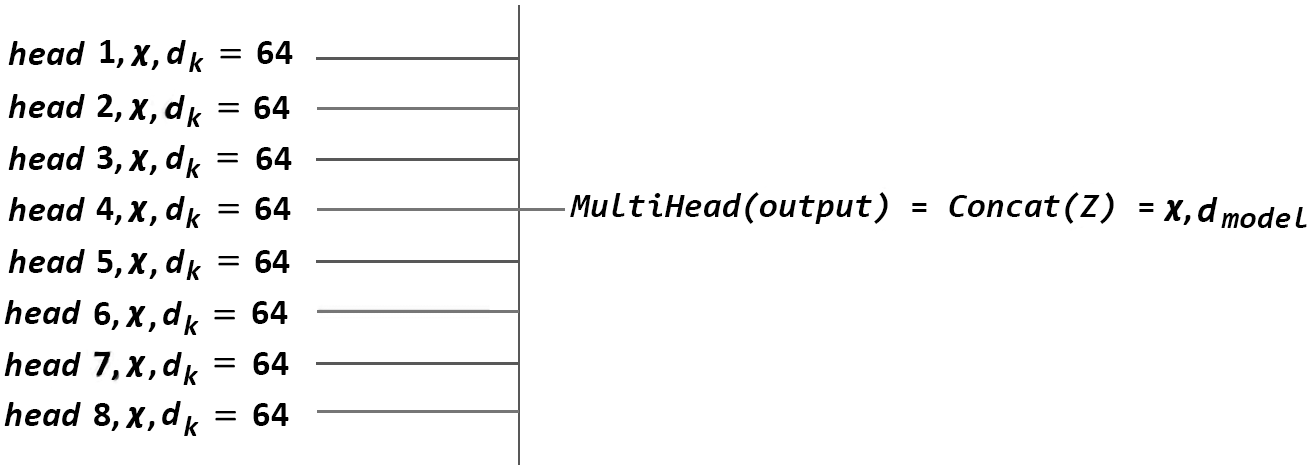

In [26]:
display(get_image_from_github('B19899_02_19.png') or print('Image not found'))

And now with Hugging Face in one line!

In [27]:
#@title Transformer Installation
!pip -q install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.8 MB/s eta 0:00:00


In [28]:
#@title Retrieve pipeline of modules and choose English to French translation
from transformers import pipeline
translator = pipeline("translation_en_to_fr")
#One line of code!
print(translator("It is easy to translate languages with transformers", max_length=40))

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': "Il est facile de traduire des langues à l'aide de transformateurs"}]
